In [60]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [66]:
#Points coordinats for two NSU documents 

#Договор на общагу НГУ №1
dog1 = [((1497, 231), (1505,254)),
((1567, 238), (1604, 252)),
((1586, 423), (2355, 452)),
((568, 598), (582, 612)),
((998, 598), (1012, 615)),
((1046, 601), (1061, 618)),
((1146, 604), (1158, 619)),
((1898,314), (1912, 332))]

# Договор на общагу НГУ №2
dog2 = [((672, 1694),(692, 1708)),
((748, 1696), (772, 1709)),
((1725, 2281), (2394,2297)),
((1393, 2320), (1954, 2333)),
((1799, 2361), (2203, 2377)),
((1179, 2773), (1711, 2826))]


# Договор на повторный курс НГУ
dog3 = [((354,1108),(1976,1140)),
       ((510,1212),(1274,1242)),
       ((1434,1214),(1862,1240)),
       ((1562,1214),(1862,1240)),
       ((1958,1208),(2030,1236)),
       ((358,1262),(2268,1302)),
       ((1206,1376),(2292,1404)),
       ((1630,1476),(2290,1500)),
       ((495,1516),(2292,1542)),
       ((1786,1822),(2270,1846)),
       ((1632,1914),(2166,1940)),
       ((1380,2060),(1746,2086)),
       ((1768,2058),(2188,2084))]

# Nist договор #1
nist_rect = [((600,336),(1890,364)),
((596,430),(1900,468)),
((596,538),(1898,564)),
]

In [67]:
test1 = cv2.imread('image.png', cv2.IMREAD_GRAYSCALE)
#cv2.namedWindow('exm', cv2.WINDOW_NORMAL)
#cv2.imshow ('exm',test1)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

In [68]:
   def calc_image(img):
    """
    Функция возвращает процент чернил в картинке
    """
    thresholded = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

    count_of_pixel = np.count_nonzero(thresholded)
    percent = 100 * np.count_nonzero(thresholded) / (img.shape[0] * img.shape[1])

    return percent

def is_signature(img, threshold=10):
    """
    Проверяем есть ли подпись в ``img``
    :param threshold: порог, при котором мы считаем, что подпись есть
    :param img: вырезанное изображение подписи
    :return: true/false
    """
    percent = calc_image(img)
    return percent > threshold, round(percent, 3)

In [69]:
# x and y coordinates mixed up with each other
def is_valid(document, rects):
    for rect in rects:
        p1,p2 = rect
        x1,y1 = p1
        x2,y2 = p2
        valid = True
        field_img = document[y1:y2,x1:x2]
        #cv2.imshow('test', field_img)
        fig = plt.figure(figsize=(17,15), dpi=120, facecolor='w', edgecolor='k')
        plt.imshow(field_img, cmap = 'gray')
        print(field_img.shape)
        plt.xticks([]), plt.yticks([])
        plt.show()
        flag = is_signature(field_img)
        print (flag)
        if flag[0] == False:
            valid = False
            #print ('Not full')
            break
    return valid

(28, 1290)


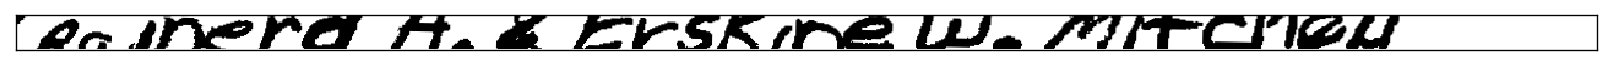

(True, 34.629)
(38, 1304)


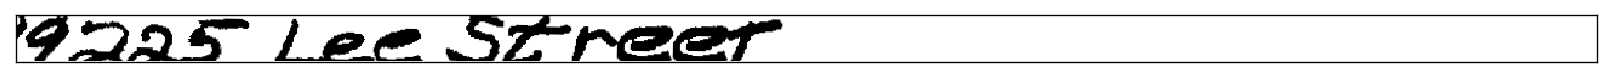

(True, 16.332)
(26, 1302)


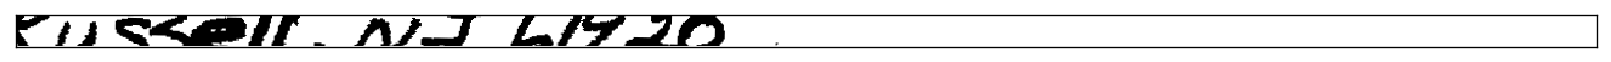

(True, 16.894)
True


In [70]:
print (is_valid(test1, nist_rect))